<a href="https://colab.research.google.com/github/AAhmadS/convex_opt/blob/main/convexOpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import plotly
import matplotlib
import numpy as np
import scipy
import random
import pandas as pd

from numpy import pad
import matplotlib.pyplot as plt
plt.switch_backend('agg')
%matplotlib inline
import matplotlib.ticker as ticker

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%mkdir /content/drive/MyDrive/cOpt
%cd /content/drive/MyDrive/cOpt

mkdir: cannot create directory ‘/content/drive/MyDrive/cOpt’: File exists
/content/drive/MyDrive/cOpt


#Load data

In [4]:
data = pd.read_csv('house_data.csv')

In [5]:
data.head(5)

,size,bedrooms,bathrooms,age,Tehran,Esfehan,Yazd,Shiraz,Tabriz,price
0,152,1,3,3,0,0,0,0,1,981653.9936
1,142,1,2,23,0,0,1,0,0,870284.3499
2,64,1,2,26,0,0,0,0,1,515868.5989
3,156,2,3,37,0,0,0,0,1,979655.8731
4,121,4,2,24,0,0,1,0,0,859453.6265


we would add the "place" column to our data. this action is done in order to ease the process of ploting price data on city variable

In [6]:
data["place"] = ['Tehran' for x in data['Tehran']]
data["place"][data['Esfehan'] == 1] = 'Esfehan'
data["place"][data['Yazd'] == 1] = 'Yazd'
data["place"][data['Shiraz'] == 1] = 'Shiraz'
data["place"][data['Tabriz'] == 1] = 'Tabriz'

<ipython-input-6-a03fe5c3958c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["place"][data['Esfehan'] == 1] = 'Esfehan'
<ipython-input-6-a03fe5c3958c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["place"][data['Yazd'] == 1] = 'Yazd'
<ipython-input-6-a03fe5c3958c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["place"][data['Shiraz'] == 1] = 'Shiraz'
<ipython-input-6-a03fe5c3958c>:5: SettingWithCopyWarning: 
A va

In [7]:
data.head(10)

,size,bedrooms,bathrooms,age,Tehran,Esfehan,Yazd,Shiraz,Tabriz,price,place
0,152,1,3,3,0,0,0,0,1,981653.9936,Tabriz
1,142,1,2,23,0,0,1,0,0,870284.3499,Yazd
2,64,1,2,26,0,0,0,0,1,515868.5989,Tabriz
3,156,2,3,37,0,0,0,0,1,979655.8731,Tabriz
4,121,4,2,24,0,0,1,0,0,859453.6265,Yazd
5,70,4,3,49,0,0,0,1,0,570964.5346,Shiraz
6,152,3,3,19,0,1,0,0,0,931339.0588,Esfehan
7,171,2,2,25,0,0,1,0,0,957482.5839,Yazd
8,124,1,2,21,1,0,0,0,0,858480.4773,Tehran
9,137,2,1,12,0,0,0,1,0,876345.6038,Shiraz


#Plot distribution of price within each categorical data

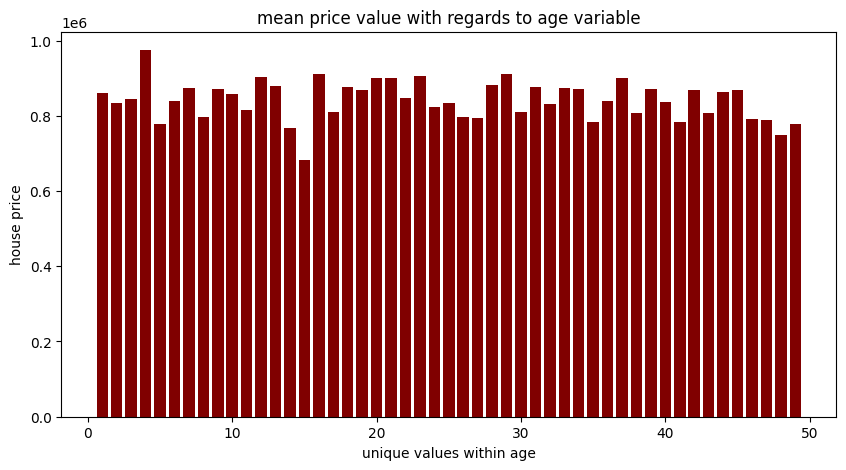

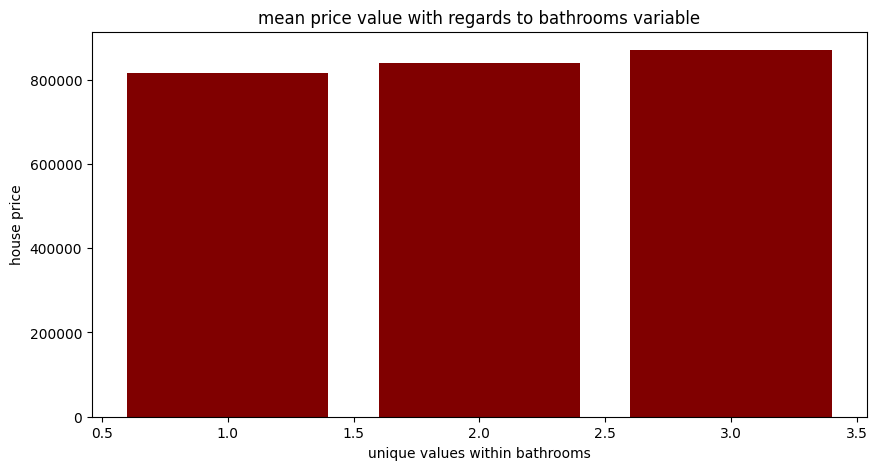

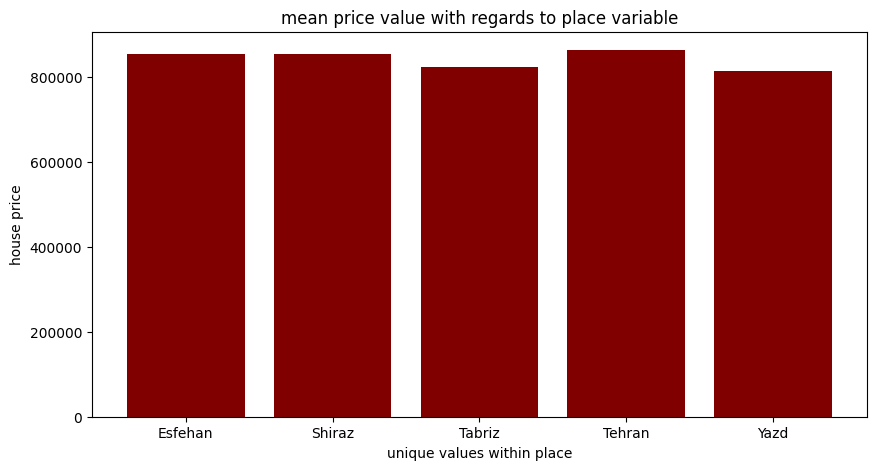

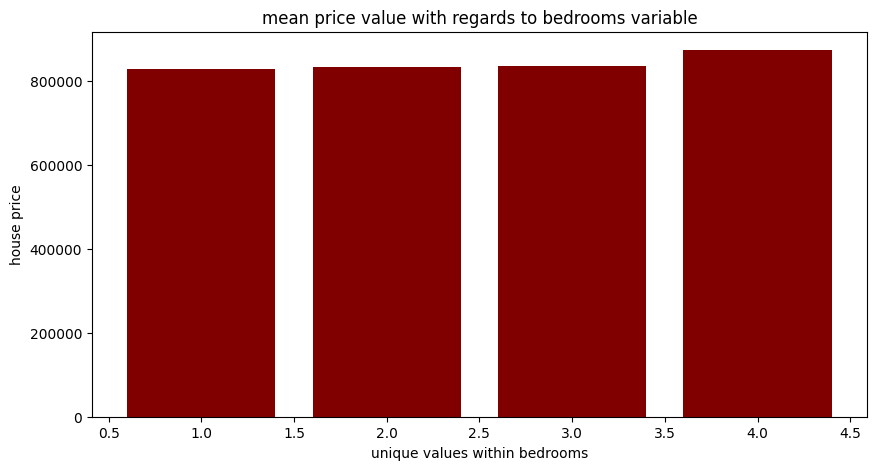

In [8]:
for x in ["age","bathrooms","place","bedrooms"] :
  data2 = data[["price",x]].groupby(by=x).mean()

  courses = list(data2.index)
  values = list(data2["price"])

  fig = plt.figure(figsize=(10, 5))

  # creating the bar plot
  plt.bar(courses, values, color='maroon')

  plt.xlabel(f"unique values within {x}")
  plt.ylabel(f"house price")
  plt.title(f"mean price value with regards to {x} variable")
  plt.show()

##Explanation:
**place :** house prices do not vary significantly in different cities, though normally, Tabtiz and Yazd tend to be cheaper in the matter<br/>
**bathrooms :** number_of_bathrooms has positive correlation with the price tag,think about it as an indicator for the house size<br/>
**age :** although the plot shows a nonlinear relation, a slightly decreasing and negative relation can be spotted<br/>
**bedrooms :** just like the **bathrooms** variable, this variable indicates the size of the house in a way, which is expected to have positive relation with price tag on the house.

#Train-Test split

We split the data with 85% rate

In [9]:
train_indices = random.sample(list(np.arange(data.shape[0])),int(0.85*data.shape[0]))
test_indices = [ind for ind in list(np.arange(data.shape[0])) if ind not in train_indices]
train_data = data.iloc[train_indices]
test_data = data.iloc[test_indices]

**variables :**
>size<br/>
>bedrooms<br/>
>bathrooms<br/>
>age<br/>

are either numerical or non-binary categorical data, so we will use standard scaling on these columns.

In [11]:
numerical = ['size','bedrooms','bathrooms','age']
for var in numerical:
  mean_var = data[var].mean()
  std_var = np.std(data[var])
  print(f"mean value and std related to {x} variable within data is being :{mean_var}, {std_var}")
  print("-"*20)
  train_data[var] = [(x - mean_var)/std_var for x in train_data[var]]
  test_data[var] = [(x - mean_var)/std_var for x in test_data[var]]

mean value and std related to bedrooms variable within data is being :125.846, 43.76501209870734
--------------------
mean value and std related to bedrooms variable within data is being :2.473, 1.1132254937792254
--------------------
mean value and std related to bedrooms variable within data is being :1.961, 0.8046607981006655
--------------------
mean value and std related to bedrooms variable within data is being :25.576, 14.197472451109034
--------------------


<ipython-input-11-1602d8b7e0e2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[var] = [(x - mean_var)/std_var for x in train_data[var]]
<ipython-input-11-1602d8b7e0e2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[var] = [(x - mean_var)/std_var for x in test_data[var]]


In [12]:
train_data.head(5)

,size,bedrooms,bathrooms,age,Tehran,Esfehan,Yazd,Shiraz,Tabriz,price,place
477,-2.887943,-2.603149,-2.376818,-1.685239,0,0,1,0,0,6.713785e+05,Yazd
292,-2.847742,-0.989297,-0.832366,-1.804305,0,0,0,0,1,1.090785e+06,Tabriz
470,-2.840433,-3.410075,-0.832366,-1.839033,0,0,0,1,0,1.253987e+06,Shiraz
982,-2.856096,-0.989297,-0.832366,-1.913449,0,0,0,0,1,1.049875e+06,Tabriz
448,-2.903606,-3.410075,-3.921270,-1.734850,1,0,0,0,0,5.749557e+05,Tehran


#MSE

mse is the function to calculate Mean-Squared Erro along with the gradients(used for SGD function)

In [13]:
def mse(y_true,y_pred):
  return sum(np.power(([x-y for (x,y) in zip(y_true,y_pred)]),2))/len(y_true) , 2*(sum(([x-y for (x,y) in zip(y_true,y_pred)]))/len(y_true))

In [14]:
mse([1,2,3],[0,0,0])

(4.666666666666667, 4.0)

#SGD func

In [32]:
def SGD(X,y,w,b,learning_rate):
  #step 1 : calculate the prediction of current parameters
  y_pred = np.matmul(X,w) +b
  #calculate the loss function which in this case is the MSE, also get grads for bias updata
  loss,grad = mse(y,y_pred)
  #calculate gradients
  b_gradient = -grad
  w_gradient = -2 * (X.T @ (y - y_pred)) / len(y)
  #update the parameters
  b = b - (learning_rate * b_gradient)
  w = w - (learning_rate * w_gradient)
  return w,b,loss

In [33]:
X = train_data[["size","bedrooms","bathrooms","age","Tehran","Esfehan","Yazd","Shiraz","Tabriz"]].to_numpy()
y = np.array(train_data['price']).reshape((-1,1))
b = 1
w = np.random.randn(X.shape[1],1)

In [34]:
SGD(X,y,w,b,0.01)

(array([[-48265.55275918],
        [-37379.28257314],
        [-40946.34626516],
        [-30326.62745223],
        [  3692.65305659],
        [  3134.22290226],
        [  3069.91252453],
        [  3501.51286368],
        [  3419.92110351]]),
 array([16820.64621952]),
 array([7.57901192e+11]))

#GradientDescentLinearRegression

In [49]:
class GradientDescentLinearRegression:
  #in the _inti_ function, we initialize batch_size, epoch  and learning rate
    def __init__(self, learning_rate=0.001, epoch=1000,batch_size = 64):
        self.learning_rate, self.epoch, self.batch = learning_rate, epoch, batch_size
        self.batch_split = 0

  #this function is called when we want to train the model
    def fit(self, X, y,X_test,Y_test):

  #first we turn inputs from dataframe and list into np array objects
        x_test, y_test = X_test.to_numpy(), np.array(Y_test).reshape((-1,1))

  #initialising bias and weights, weights are chosen from mean 0 and variance matrix equivilant to I
        self.b = 1
        self.w = np.random.randn(X.shape[1],1)
        n = X.shape[0]
        self.batch_split = int(n/self.batch)

  #the two lists are to be returned in the output
        losses = []
        test_losses = []

  #we start each step
        for e in range(self.epoch):

  #this function returns batched indices, we will use these to get subsets of data for each SGD updata
          batch_ind = self.batched(n)
          total_loss = 0

  #we start loop on each pack of data
          for b in batch_ind:

  #since SGD works with numpy obj, we first batch the data and then turn them into np objs
            X_t,y_t = X.iloc[b].to_numpy(), np.array(pd.DataFrame(y).iloc[b]).reshape((-1,1))

  #updating weights
            self.w, self.b,loss = SGD(X_t, y_t, self.w, self.b, self.learning_rate)

  #summing up loss
            total_loss+=loss * len(y_t)

  #now its time to calculate loss within train data
          losses.append(total_loss / len(y))

  #calculating the test data loss using the SGD, for ease of computation
          _,_,test_loss = SGD(x_test, y_test, self.w, self.b, self.learning_rate)
          test_losses.append(test_loss)

        return losses, test_losses

    def predict(self, X):
        X.to_numpy()
        return X@self.w + self.b

  #this function shuffles a list of indices, turns them into batches and gives them back
    def batched(self,leng):
      random_list = np.arange(leng)
      np.random.shuffle(random_list)
      batches_ind = []
      for ind in range(0,self.batch_split):
        beg_ind = ind * self.batch
        end_ind = min((ind+1) * self.batch,leng)
        batches_ind.append(random_list[beg_ind:end_ind])
      return batches_ind

In [50]:
X = train_data[["size","bedrooms","bathrooms","age","Tehran","Esfehan","Yazd","Shiraz","Tabriz"]]
y = train_data['price']
X_test = test_data[["size","bedrooms","bathrooms","age","Tehran","Esfehan","Yazd","Shiraz","Tabriz"]]
y_test = test_data['price']
GDLR = GradientDescentLinearRegression(0.001,100,4)
losses, t_losses = GDLR.fit(X,y,X_test,y_test)

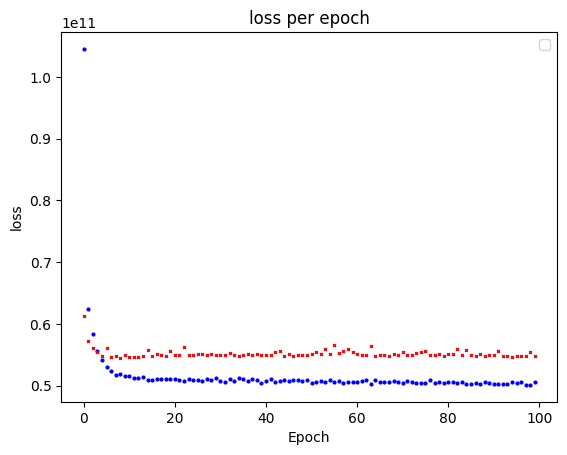

In [52]:
train_label = "train_loss"
test_label = "test_loss"
X = np.arange(len(losses))
y1 = losses
y2 = t_losses
plt.plot(X,y1,'bo',linewidth =1 , markersize = 2)
plt.plot(X,y2,'rx',linewidth =1 , markersize = 2)
plt.title("loss per epoch")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

**Results are as expected :**
train MSE is less than test MSE which is totally fine, since every model tends to learn residuals and error terms specifically related to it's training data.
after some steps it seemingly has reached It's optimal point, For it is a simple Regression function, not much better was expected.